## Generate Result Tables
- MCHAD
- G-MCHAD
- CAC
- II
- Center Loss
- Softmax Thresholding
- Energy based OOD


In [43]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

In [45]:
# map test cases
dataset_map = {
    "test_vs_uniformnoise": "Gauss",
    "test_vs_gaussiannoise": "Uniform",
    "test_vs_tinycrop": "Tiny Crop",
    "test_vs_tinyresize": "Tiny Resize",
    "test_vs_lsuncrop": "LSUN Crop",
    "test_vs_lsunresize": "LSUN Resize",
    "test_vs_textures": "Texture",
}

# map
model_map = {
    "src.models.CAC": "CAC",
    "src.models.Softmax": "Softmax",
    "src.models.MCHAD": "MCHAD",
    "src.models.Center": "Center",
    "src.models.II": "II",
}

In [46]:
def convert(df, key="Distance", task="OSR"):

    df.rename(
        inplace=True,
        columns={
            "Accuracy/test": "Accuracy",
            f"{key}/{task}/AUROC/test": "AUROC",
            f"{key}/{task}/AUPR-IN/test": "AUPR-IN",
            f"{key}/{task}/AUPR-OUT/test": "AUPR-OUT",
            f"{key}/{task}/FPR@95TPR/test": "FPR95",
        },
    )

    return df

In [47]:
root = "/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/"

directories = [
    "./cifar10/gmchad/3",
    "./cifar10/gmchad/1",
    "./cifar10/gmchad/0",
    "./cifar10/gmchad/2",
    "./cifar10/gmchad/5",
    "./cifar10/gmchad/4",
    "./cifar10/center/3",
    "./cifar10/center/1",
    "./cifar10/center/0",
    "./cifar10/center/2",
    "./cifar10/center/5",
    "./cifar10/center/4",
    "./cifar10/softmax/3",
    "./cifar10/softmax/1",
    "./cifar10/softmax/0",
    "./cifar10/softmax/2",
    "./cifar10/softmax/5",
    "./cifar10/softmax/4",
    "./cifar10/mchad/3",
    "./cifar10/mchad/1",
    "./cifar10/mchad/0",
    "./cifar10/mchad/2",
    "./cifar10/mchad/5",
    "./cifar10/mchad/4",
    "./cifar10/ii/3",
    "./cifar10/ii/1",
    "./cifar10/ii/0",
    "./cifar10/ii/2",
    "./cifar10/ii/5",
    "./cifar10/ii/4",
    "./cifar10/cac/3",
    "./cifar10/cac/1",
    "./cifar10/cac/0",
    "./cifar10/cac/2",
    "./cifar10/cac/5",
    "./cifar10/cac/4",
    "./cifar100/mchad/3",
    "./cifar100/mchad/1",
    "./cifar100/mchad/0",
    "./cifar100/mchad/2",
    "./cifar100/mchad/5",
    "./cifar100/mchad/4",
    "./cifar100/gmchad/3",
    "./cifar100/gmchad/1",
    "./cifar100/gmchad/0",
    "./cifar100/gmchad/2",
    "./cifar100/gmchad/5",
    "./cifar100/gmchad/4",
    "./cifar100/center/3",
    "./cifar100/center/1",
    "./cifar100/center/0",
    "./cifar100/center/2",
    "./cifar100/center/5",
    "./cifar100/center/4",
    "./cifar100/softmax/3",
    "./cifar100/softmax/1",
    "./cifar100/softmax/0",
    "./cifar100/softmax/2",
    "./cifar100/softmax/5",
    "./cifar100/softmax/4",
    "./cifar100/ii/3",
    "./cifar100/ii/1",
    "./cifar100/ii/0",
    "./cifar100/ii/2",
    "./cifar100/ii/5",
    "./cifar100/ii/4",
    "./cifar100/cac/3",
    "./cifar100/cac/1",
    "./cifar100/cac/0",
    "./cifar100/cac/2",
    "./cifar100/cac/5",
    "./cifar100/cac/4",
    "./svhn/gmchad/3",
    "./svhn/gmchad/1",
    "./svhn/gmchad/0",
    "./svhn/gmchad/2",
    "./svhn/gmchad/5",
    "./svhn/gmchad/4",
    "./svhn/center/3",
    "./svhn/center/1",
    "./svhn/center/0",
    "./svhn/center/2",
    "./svhn/center/5",
    "./svhn/center/4",
    "./svhn/softmax/3",
    "./svhn/softmax/1",
    "./svhn/softmax/0",
    "./svhn/softmax/2",
    "./svhn/softmax/5",
    "./svhn/softmax/4",
    "./svhn/mchad/3",
    "./svhn/mchad/1",
    "./svhn/mchad/0",
    "./svhn/mchad/2",
    "./svhn/mchad/5",
    "./svhn/mchad/4",
    "./svhn/ii/3",
    "./svhn/ii/1",
    "./svhn/ii/0",
    "./svhn/ii/2",
    "./svhn/ii/5",
    "./svhn/ii/4",
    "./svhn/cac/3",
    "./svhn/cac/1",
    "./svhn/cac/0",
    "./svhn/cac/2",
    "./svhn/cac/5",
    "./svhn/cac/4",
]

In [48]:
from omegaconf import OmegaConf
import pandas as pd
from os.path import join


train_dataset_map = {
    "src.datamodules.cifar10_datamodule.CIFAR10DataModule": "CIFAR10",
    "src.datamodules.SVHNDataModule": "SVHN",
    "src.datamodules.cifar100_datamodule.CIFAR100DataModule": "CIFAR100",
}


def get_training_set(datamodule):
    target = datamodule["_target_"]
    d = train_dataset_map.get(target)

    if not d:
        if target == "src.datamodules.multi_datamodule.MultiDatamodule":
            d = train_dataset_map.get(datamodule["module1"]["_target_"])

    if not d:
        print(datamodule)
    else:
        print(d)

    return d


def load(path):
    local_df = []

    df = pd.read_csv(join(path, "results.csv"))
    metrics = pd.read_csv(join(path, "csv/version_0/metrics.csv"))
    config = OmegaConf.load(join(path, "config.yaml"))
    df["Dataset"] = get_training_set(config["datamodule"])
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    model = str(config["model"]["_target_"])

    if model == "src.models.CAC":
        df["Model"] = "CAC"
        df = convert(df, "Distance")
    elif model == "src.models.SoftMax":
        print("EBM")
        df_ebm = df.copy(deep=True)
        df_ebm["Model"] = "EBM"
        df_emb = convert(df_ebm, "EnergyBased")

        local_df.append(df_ebm)

        print("Softmax")
        df["Model"] = "Softmax"
        df = convert(df, "Softmax")

    elif model == "src.models.MCHAD":
        if config["model"]["weight_oe"] == 0.0:
            # print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "MCHAD"
        else:
            print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "G-MCHAD"

        df = convert(df)
    elif model == "src.models.Center":
        df["Model"] = "Center"
        df = convert(df, "Softmax")
    elif model == "src.models.IIModel":
        df["Model"] = "II"
        df = convert(df)
    else:
        print(f"UNKNOWN: {model}")
        return None, None

    local_df.append(df)
    return config, pd.concat(local_df), metrics

In [49]:
dfs = []

for d in directories:
    # filter(lambda x: "center" not in x and "cifar100/softmax/" not in x and "mchad-o" not in x, directories):
    path = join(root, d)
    config, df, metrics = load(path)
    try:
        if df is not None:
            print(path)
            print(
                f"{df['Dataset'][0]}/{df['Model'][0]} -> {df['AUROC'].mean()} {len(df)}"
            )
            df = df[
                [
                    "Accuracy",
                    "AUROC",
                    "AUPR-IN",
                    "AUPR-OUT",
                    "FPR95",
                    "Dataset",
                    "Outliers",
                    "Model",
                ]
            ]
            dfs.append(df.copy())
    except:
        print("EXCEPTION WHILE LOADING")
        print(df.columns)

df = pd.concat(dfs)

CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/3
CIFAR10/G-MCHAD -> 0.8800134573663984 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/1
CIFAR10/G-MCHAD -> 0.879264099257333 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/0
CIFAR10/G-MCHAD -> 0.8553295646395002 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/2
CIFAR10/G-MCHAD -> 0.8040333901132856 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/5
CIFAR10/G-MCHAD -> 0.8562206370489938 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/4
CIFAR10/G-MCHAD -> 0.8600879652159554 8
CIFAR10
/home/ki/projects/work/mchad/logs/multiruns/complete/11/3

In [51]:
df["AUROC"] = df["AUROC"].apply(lambda x: x * 100)
df["AUPR-IN"] = df["AUPR-IN"].apply(lambda x: x * 100)
df["AUPR-OUT"] = df["AUPR-OUT"].apply(lambda x: x * 100)
df["FPR95"] = df["FPR95"].apply(lambda x: x * 100)
df["Accuracy"] = df["Accuracy"].apply(lambda x: x * 100)

In [52]:
df = df.set_index(["Dataset", "Outliers", "Model"]).dropna()

In [53]:
df

Accuracy      AUROC    AUPR-IN   AUPR-OUT  \
Dataset Outliers    Model                                                 
CIFAR10 Texture     G-MCHAD  91.549999  92.668939  96.349508  84.385568   
        Gauss       G-MCHAD  91.549999  98.830867  99.206853  97.960144   
        Uniform     G-MCHAD  91.549999  99.158531  99.407947  98.687899   
        Tiny Crop   G-MCHAD  91.549999  64.948547  71.162266  57.113993   
        Tiny Resize G-MCHAD  91.549999  91.735333  93.107003  89.591748   
...                                ...        ...        ...        ...   
SVHN    Uniform     CAC      95.520896  95.046109  96.601617  87.202132   
        Tiny Crop   CAC      95.520896  91.462266  92.755842  83.344030   
        Tiny Resize CAC      95.520896  89.349258  91.546655  79.518890   
        LSUN Crop   CAC      95.520896  92.028987  92.835921  85.987985   
        LSUN Resize CAC      95.520896  87.650132  90.103328  77.006012   

                                 FPR95  
Dataset Outliers    Model               
CIFAR10 Texture     G-MCHAD  49.734041  
        Gauss       G-MCHAD   0.630000  
        Uniform     G-MCHAD   0.340000  
        Tiny Crop   G-MCHAD  96.039999  
        Tiny Resize G-MCHAD  51.279998  
...                                ...  
SVHN    Uniform     CAC      17.200001  
        Tiny Crop   CAC      24.030000  
        Tiny Resize CAC      31.590000  
        LSUN Crop   CAC      19.280000  
        LSUN Resize CAC      35.760000  

[882 rows x 5 columns]

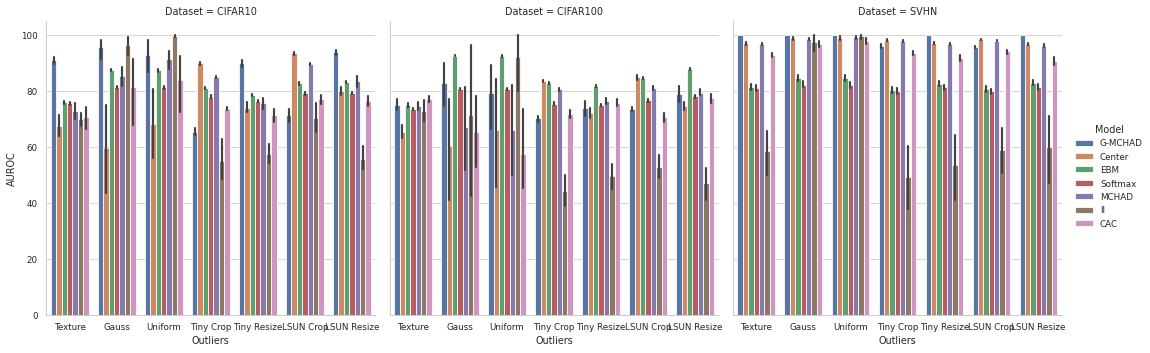

In [54]:
import seaborn as sb
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10,5))
g = sb.catplot(
    data=df.reset_index(),
    x="Outliers",
    y="AUROC",
    hue="Model",
    orient="v",
    col="Dataset",
    kind="bar",
)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# g.xlabel("Outlier Dataset")
# g.ylabel("Anomaly Detection AUROC (%)")
# plt.tight_layout()
plt.savefig(f"out/res.pgf", dpi=300)

In [55]:
print(
    df.reset_index()
    .groupby(by=["Dataset", "Model"])
    .agg(
        {
            "Accuracy": ["mean", "std"],
            "AUROC": ["mean", "std"],
            "AUPR-IN": ["mean", "std"],
            "AUPR-OUT": ["mean", "std"],
            "FPR95": ["mean", "std"],
        }
    )
    .to_latex(
        float_format="%.2f",
        multirow=True,
        escape=False,
        label="tab:results",
        # bold_rows="True",
    )
)

\begin{table}
\centering
\label{tab:results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
     &         & \multicolumn{2}{l}{Accuracy} & \multicolumn{2}{l}{AUROC} & \multicolumn{2}{l}{AUPR-IN} & \multicolumn{2}{l}{AUPR-OUT} & \multicolumn{2}{l}{FPR95} \\
     &         &     mean &  std &  mean &   std &    mean &   std &     mean &   std &  mean &   std \\
Dataset & Model &          &      &       &       &         &       &          &       &       &       \\
\midrule
\multirow{7}{*}{CIFAR10} & CAC &    90.54 & 0.19 & 76.18 &  9.15 &   74.30 & 11.57 &    72.76 & 10.23 & 75.33 & 14.38 \\
     & Center &    88.69 & 0.16 & 75.91 & 15.41 &   80.07 & 11.87 &    71.57 & 17.05 & 73.38 & 18.70 \\
     & EBM &    89.46 & 0.28 & 82.26 &  4.05 &   82.30 &  3.84 &    80.03 &  7.45 & 64.19 &  7.75 \\
     & G-MCHAD &    91.22 & 0.22 & 85.58 & 11.93 &   88.75 & 10.02 &    80.43 & 14.04 & 55.44 & 31.26 \\
     & II &    28.72 & 1.33 & 71.98 & 18.46 &   72.72 & 19.08 &    69.52 & 18.15 & 65.86 & 37.80 \\

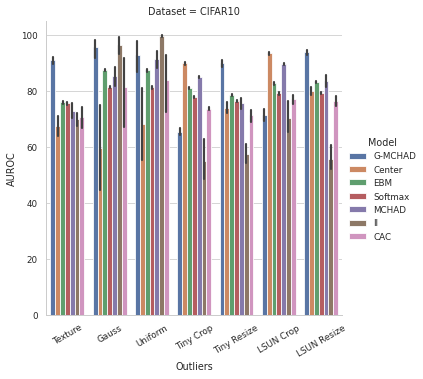

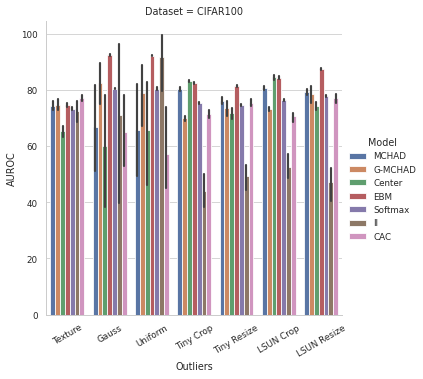

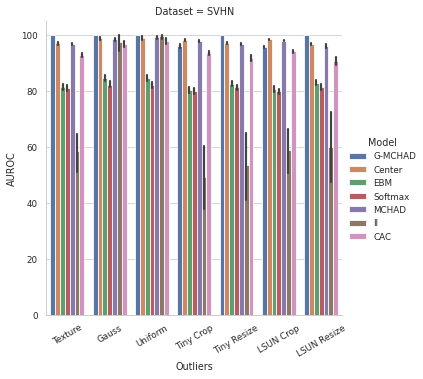

In [57]:
for dataset in ["CIFAR10", "CIFAR100", "SVHN"]:
    g = sb.catplot(
        data=df.reset_index()[df.reset_index()["Dataset"] == dataset],
        x="Outliers",
        y="AUROC",
        kind="bar",
        hue="Model",
        col="Dataset",
    )
    g.set_xticklabels(rotation=30)
    plt.savefig(f"out/single-auroc-{dataset}.png", dpi=300)
    plt.show()

In [71]:
tmp = df.reset_index()
tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

print(
    tmp
    .groupby(by=["Dataset", "Model"])
    .agg(
        {
            "Accuracy": ["mean", "std"],
            "AUROC": ["mean", "std"],
            "AUPR-IN": ["mean", "std"],
            "AUPR-OUT": ["mean", "std"],
            "FPR95": ["mean", "std"],
        }
    )
    .to_html(
        float_format="%.2f",
        escape=False,
    )
)

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">Accuracy</th>
      <th colspan="2" halign="left">AUROC</th>
      <th colspan="2" halign="left">AUPR-IN</th>
      <th colspan="2" halign="left">AUPR-OUT</th>
      <th colspan="2" halign="left">FPR95</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>Dataset</th>
      <th>Model</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">CIFAR10</th>
      <th>G-MCHAD</th>
      <td>91.22</td>
      <td>0.22</td>
      <td>85.58</td>
      <td>11.93</td>
      

In [60]:
!pip install tabulate


  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
You should consider upgrading via the '/home/ki/projects/work/mchad/venv/bin/python -m pip install --upgrade pip' command.
